# <font color='red'><i>Ocean 215, Assignment 3</i></font>  (Due 11/26/19)
### <font color='blue'>(110 possible points)</font>
### <font color='green'>Your score 110/110 points.  Graded by SR.</font>
### [Note:  submit your completed assignment as a <i><font color='red'>ipynb</i></font> file on Canvas under the Assignments tab.   Name your file using the convention <font color='red'><i>lastname.firstname.A3.215.2019.ipynb</i></font> . ]

#### 1.  The file <i><font color='blue'>IO.surface.O2.raw.txt</font></i> (available on the Canvas site) contains surface dissolved oxygen data for the southern Indian Ocean.  Open the file in a text editor in order to determine what information is contained in the file. 
#### (a) Write a function to check the file for missing or corrupted data and then fill these gaps by linear interpolation. The input to your function should be the file path and name, and the function should return all the data from the file (including the corrections) as well as the positions and new values for the corrected points.  Your function can read the file using any appropriate method of your choice.
#### (b) Write code to determine the geographical extent (i.e., minimum and maximum latitudes and longitudes) of the data in the file. 
#### (c)  Using the edited data, make a filled-contour plot of surface oxygen over the geographical area given in the file.  Label the contours on the plot and add a colorbar.  Pick a color map that will usefully highlight the difference in values of oxygen over the region.  Label the axes and provide a title for the plot.  <font color='red'>(10 points for each part, for a total of 30 points)</font>

linear interpolation 316.83 317.11 317.39
linear interpolation 321.38 326.26 331.14
linear interpolation 314.25 312.435 310.62
linear interpolation 303.57 302.76 301.95
linear interpolation 309.71 309.535 309.36
linear interpolation 290.2 287.45 284.7
linear interpolation 214.34 213.19 212.04
linear interpolation 213.14 213.5 213.86
linear interpolation 207.95 206.89 205.83
linear interpolation 208.42 207.62 206.82
linear interpolation 207.22 208.265 209.31
Maximum Latituted= -20.4
minumum Latituted= -49.58
Maximum Longitudes= 88.58
minumum Longitudes= 40.42


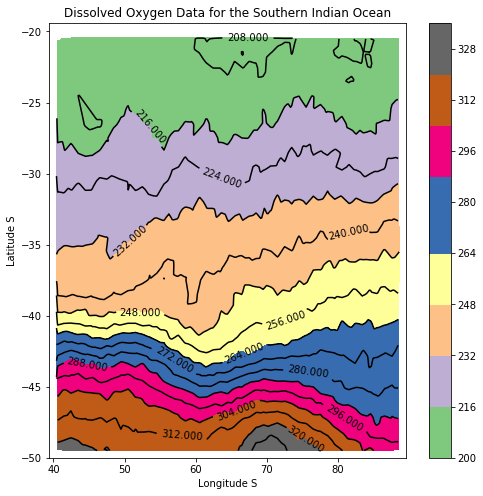

In [2]:
#1A
import numpy as np
#data=np.genfromtxt('C:/Users/Kelebet Engida/Downloads/IO.surface.O2.data.raw.txt',filling_values=-9999) #,filling_values=-9999,missing_values='*'
data=np.genfromtxt('/Users/riser/Desktop/o215.2019/datasets/IO.surface.O2.data.raw.txt',filling_values=-9999) #,filling_values=-9999,missing_values='*'
#
#
num=1440

yy=data[:,2]
flag=-20.
for i in range(0,num):
    if yy[i] < flag:
        yyint=(yy[i-1]+yy[i+1])/2.
        data[i,2] = yyint
        print ('linear interpolation',yy[i-1],yyint,yy[i+1])
#1B

lat=data[:,0]
lon=data[:,1]
DO=data[:,2]

lat_max=-90
nn=len(lat)
for i in range(0,num):
    if lat[i] > lat_max:
        lat_max=lat[i]
print("Maximum Latituted=",lat_max) 
   
for i in range(0,num):
    if lat[i] < lat_max:
        lat_max=lat[i]
print("minumum Latituted=",lat_max) 

lon_max=40
mm=len(lon)
for i in range(0,num):
    if lon[i] > lon_max:
        lon_max=lon[i]
print("Maximum Longitudes=",lon_max) 
   
for i in range(0,num):
    if lon[i] < lon_max:
        lon_max=lon[i]
print("minumum Longitudes=",lon_max)   

#1C

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as ml                 
                           
latmin=-49
latmax=-20.4
lonmin=40.42
lonmax=88.58
fig=plt.figure(figsize=(8,8))

ngrid=300
xi=np.linspace(lonmin-1,lonmax+1,ngrid)
yi=np.linspace(latmin-1,latmax+1,ngrid)

zi=ml.griddata(lon,lat,DO,xi,yi,interp='linear')

cp1=plt.contourf(xi,yi,zi,20,cmap=plt.cm.Accent)
cp2=plt.contour(xi,yi,zi,20,colors='k')

cbar=plt.colorbar(cp1)
plt.clabel(cp2)

plt.xlabel('Longitude S')
plt.ylabel('Latitude S')
plt.title('Dissolved Oxygen Data for the Southern Indian Ocean')

plt.show()         
# 30/30 points

#### 2. The file <font color='blue'><i>marine_mammal_species_list.txt</i></font> (available on the Canvas site) gives both the common and scientific names (genus and species) of most of the marine mammal types that exist in the world ocean.  In addition to these names, the file notes some simple, useful information about each species (<i>EX</i> = extinct; <i>EW</i> = extinct in the wild; <i>CR</i> = critically endangered; <i>EN</i> = endangered; <i>VU</i> = vulnerable; <i>NT</i> = near threatened; <i>LC</i> = least concern; <i>DD</i> = deficient data).  Write code to read this file, and answer the following questions:
#### (a) How many species have the word <i><font color='blue'>whale</font></i> in their common name?
#### (b) Are there any species of seals that are extinct?
#### (c) How many species are endangered?
#### (d) How many times do the letters 'a' and 'e' appear next to each other (in any order) in the file in the same word?
#### (e) How many characters (total, including blanks but not including end-of-line characters) are in this file? <font color='red'>(10 points for each part, for a total of 50 points)</font>


In [6]:
#2A
import numpy as np
#path='C:/Users/Kelebet Engida/Downloads/marine_mammal_species.list (1).txt'
path='/Users/riser/Desktop/o215.2019/datasets/marine_mammal_species.list.txt'
count=0
file_obj=open(path,'r',errors='replace')
data_line=file_obj.readline()
xx=data_line

n=134
for i in range(0,134):
    data_line0=file_obj.readline()
    data_line=data_line0.rstrip('\n')
    #print(i,data_line)
    if "whale" in data_line:
        count=count+1
print(count)

#2B
#path='C:/Users/Kelebet Engida/Downloads/marine_mammal_species.list (1).txt'
path='/Users/riser/Desktop/o215.2019/datasets/marine_mammal_species.list.txt'
count=0
file_obj=open(path,'r',errors='replace')
data_line=file_obj.readline()
xx=data_line

for i in range(0,134):
    data_line0=file_obj.readline()
    data_line=data_line0.rstrip('\n')
    #print(i,data_line)
    if "EX" in data_line:
        if "seal" in data_line:
            count=count+1
print(count)

#2C
#path='C:/Users/Kelebet Engida/Downloads/marine_mammal_species.list (1).txt'
path='/Users/riser/Desktop/o215.2019/datasets/marine_mammal_species.list.txt'
count=0
file_obj=open(path,'r',errors='replace')
data_line=file_obj.readline()
xx=data_line

for i in range(0,134):
    data_line0=file_obj.readline()
    data_line=data_line0.rstrip('\n')
    #print(i,data_line)
    if "EN" in data_line:
        count=count+1
print(count)
#2D
#path='C:/Users/Kelebet Engida/Downloads/marine_mammal_species.list (1).txt'
path='/Users/riser/Desktop/o215.2019/datasets/marine_mammal_species.list.txt'
count=0
file_obj=open(path,'r',errors='replace')
data_line=file_obj.readline()
xx=data_line

characters = 0
for i in range(0,134):
    data_line0=file_obj.readline()
    data_line=data_line0.rstrip('\n')
    #print(i,data_line)
    for characters in range(0,len(data_line)):
        if data_line[characters] == "e":
            if data_line[characters+1] == "a":
                count=count+1
        if data_line[characters] == "a":
            if data_line[characters+1] == "e":
                count=count+1
print(count)

#2E
#path='C:/Users/Kelebet Engida/Downloads/marine_mammal_species.list (1).txt'
path='/Users/riser/Desktop/o215.2019/datasets/marine_mammal_species.list.txt'
count=0
lines = 0
words = 0
characters = 0
file_obj=open(path,'r',errors='replace')

for i in range(0,134):
    data_line0=file_obj.readline()
    data_line0=data_line0.rstrip('\n')
    # wordslist = data_line.split()
    characters = characters + len(data_line0)
    count=count+1
print(characters)
# 50/50 points

47
1
14
97
5735


#### 3. The <i><font color='red'>Atlantic right whale</i></font> is seriously endangered, with only a few hundred individuals remaining.  A major effort in cataloging the numbers of these whales and attempting to increase their numbers has been in existence for the past 30-40 years. The file <font color='blue'><i>atlantic.right.whale.population.txt</i></font> (available on the Canvas site) provides a history of the estimated number of these whales from 1990 to the present.  Using this file, carry out the following:
#### (a) Write Python code to read the file.   Make a plot of the number of individuals versus time, based on the data in the file.  Label the axes of your plot, show both lines and points (different colors), and draw a grid on the plot. When did the overall trend in the number of right whales increase (i.e., provide a range of years)? When did the overall trend in the number decrease (again, a range of years)? 
#### (b) Carry out a linear regression for the time when the population was increasing.   Show the line resulting from this regression on your plot from part (a). What was the general increase in the number of individuals per year during this time?   Is the linear fit credible?
#### (c) Carry out a linear regression for the time when the population was decreasing.  Show the line resulting from this regression on your plot from part (a).  Is the linear fit credible?  If the present trend in the rate of decline continues, when would the right whale population fall to zero? <font color='red'>(10 points for each part, for a total of 30 points)</font>


30
number of points in aaray 30
overall trend in the number of right whales increase between 1990-2010
overall trend in the number of right whales deacreased between 2010-2019
 slope = 10.8324675325
intercept = -21287.1255411
 r-squared value= 0.996804765441
 slope = -9.39393939394
intercept = 19368.6909091
 r-squared value= 0.984836187206
The general increase of indvidual whales per year during 1990-2010 was 10.78 whales per year. The linear line for this regression isnt cridible because the r-squared value is 0.99 which isnt with in the 5% margin to be credible.


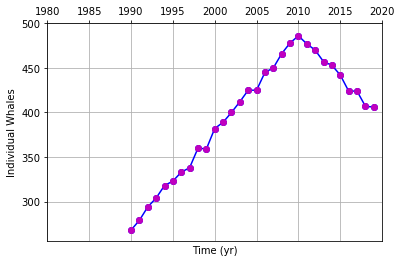

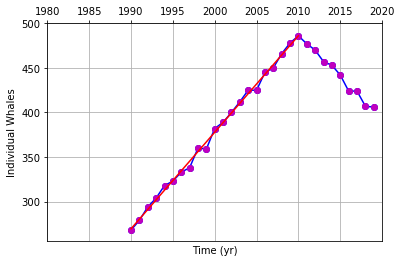

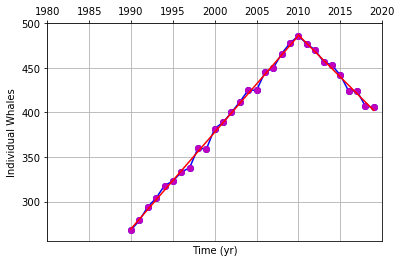

The general deacrease of indvidual whales per year during 2010-2019 was -8.95 whales per year. The linear line for this regression isnt cridible because the r-squared value is 0.98 which isnt with in the 5% margin to be credible.
The whale population will fall to zero in 2062


In [7]:
#3A
import numpy as np
#data=np.loadtxt('C://Users/Kelebet Engida/Downloads/atlantic.right.whale.population.txt')
data=np.loadtxt('/Users/riser/Desktop/o215.2019/datasets/atlantic.right.whale.population.txt')
nn=len(data)
print(nn)

import numpy as np
import matplotlib.pyplot as plt

T=data[:,0]
I=data[:,1]

nn=30

aa=np.zeros(nn)

aa=data[:,0]
bb=data[:,1]
print ('number of points in aaray',nn)

fig1=plt.figure()
plt.axis([1980,2020,256,500])
plt.plot(aa,bb,'-bo')
plt.plot(aa,bb,'mo')
plt.grid()
#
ax=fig1.add_subplot(111)
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_top()
ax.set_xlabel('Time (yr)')
ax.set_ylabel('Individual Whales')

print('overall trend in the number of right whales increase between 1990-2010')
print('overall trend in the number of right whales deacreased between 2010-2019')

#3B
import numpy as np
from scipy import stats
aa_inc=data[0:21,0]
bb_inc=data[0:21,1]

slope,intercept,r_value,p_value,std_err=stats.linregress(aa_inc,bb_inc)
rsq=r_value**2
print (' slope =',slope)
print('intercept =',intercept)
print(' r-squared value=',rsq)
cc_inc=(slope*aa_inc)+intercept
aa_dec=data[20:30,0]
bb_dec=data[20:30,1]
yy=10.7896103896*aa_inc+-21203.6493506
zz=-9.21666666667*aa_dec+19008.3611111



slope,intercept,r_value,p_value,std_err=stats.linregress(aa_dec,bb_dec)
rsq=r_value**2
print (' slope =',slope)
print('intercept =',intercept)
print(' r-squared value=',rsq)
cc_dec=(slope*aa_dec)+intercept

fig1=plt.figure()
plt.axis([1980,2020,256,500])
plt.plot(aa,bb,'-bo')
plt.plot(aa,bb,'mo')
plt.plot(aa_inc,cc_inc,'-r')
plt.grid()
ax=fig1.add_subplot(111)
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_top()
ax.set_xlabel('Time (yr)')
ax.set_ylabel('Individual Whales')

print('The general increase of indvidual whales per year during 1990-2010 was 10.78 whales per year. The linear line for this regression isnt cridible because the r-squared value is 0.99 which isnt with in the 5% margin to be credible.')
#3C

fig1=plt.figure()
plt.axis([1980,2020,256,500])
plt.plot(aa,bb,'-bo')
plt.plot(aa,bb,'mo')
plt.plot(aa_inc,cc_inc,'-r')
plt.plot(aa_dec,cc_dec,'-r')
plt.grid()
ax=fig1.add_subplot(111)
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_top()
ax.set_xlabel('Time (yr)')
ax.set_ylabel('Individual Whales')
plt.show()

print('The general deacrease of indvidual whales per year during 2010-2019 was -8.95 whales per year. The linear line for this regression isnt cridible because the r-squared value is 0.98 which isnt with in the 5% margin to be credible.')

#If the present trend in the rate of decline continues, when would the right whale population fall to zero?
#yy=-9.21666666667*aa_dec+19008.3611111
#0=-9.21666666667*aa_dec+19008.3611111
#aa_dec reaches 0= 2062
print('The whale population will fall to zero in 2062')
# 30/30 points

#### Note:  there are many methods to answer these questions using Python code.  <font color='red'><i>For this assignment, DO NOT use any features of Python that have not been discussed in class or that do not appear in the class notes.</i></font>

